# Micro Risks and Pareto Improving Policies 

In [1]:
import Pkg; Pkg.activate(joinpath(@__DIR__, ".."))
using Revise
using MicroRisks
using ProgressMeter
using CairoMakie
using LaTeXStrings
using StatsBase
using Roots

  Activating project at `C:\Users\manue\GitHub\micro_risks_pareto_improving_policies`


In [2]:
_φ = 1/Base.MathConstants.φ

0.6180339887498948

In [3]:
ProgressMeter.ijulia_behavior(:clear);

## Benchmark Economy

In [4]:
# Household
h = let 
    # labor supply
    v = GHH(θ = 1.0, ν = 0.2)
 
    # income process
    ar1 = 0.9695
    sigmaP = sqrt(0.0384)/(1 + v.ν)
    sigmaIID = sqrt(0.0522)/(1 + v.ν)
    P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

    # consumption preferences
    ies = 1 
    crra = 5.5
    β = 0.993
    u = EZ(ies = ies, ra = crra, β = β)

    Household(u = u, a_grid = grid(stop = 10.0, length = 500, scale = :log),
        v = v, P = P, z_grid = z_vals)
end

EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002

In [5]:
# Technology
t = let
    δ = 0.1
    A = 0.2
    α = 0.3
    μ = 1.4
    CobbDouglasTechnology(α = α, A = A^((1 - α)), δ = δ, μ = μ)
end

α=0.3, A=0.32413131933855255, δ=0.1

Initial equilibrium (laissez faire)

In [6]:
@time e_init = stationary_laissez_faire(h, t; r_range = (-0.02, 0.0), verbose = true)

Progress:  9 	 Time: 0:00:34
  r:      -0.01699696085396038
  error:  -6.429290433374035e-11


 36.187664 seconds (6.80 M allocations: 498.090 MiB, 0.70% gc time, 14.02% compilation time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.01699696085396038, w=0.15015100354129204, T=0.0, a=0.5601165062734025, k=0.5601165063376954, b=0.0, n=0.7224718193413822

Progress:  7 	 Time: 0:00:25
  r:      -0.01699696083797072
  error:  4.307696421790297e-10

Progress:  9 	 Time: 0:00:25
  r:      -0.01699696085396038
  error:  -6.429290433374035e-11

Progress:  9 	 Time: 0:00:25
  r:      -0.01699696085396038
  error:  -6.429290433374035e-11


 27.609901 seconds (6.35 M allocations: 467.328 MiB, 0.96% gc time, 18.98% compilation time: <1% of which was recompilation)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.01699696085396038, w=0.15015100354129204, T=0.0, a=0.5601165062734025, k=0.5601165063376954, b=0.0, n=0.7224718193413822

## Constant-K Transition

Transition to a higher debt level

In [7]:
# b = 0.6 y0 
b_target = y(e_init) * 0.60

0.1301758424452939

Final equilibrium with higher debt and same k

In [8]:
@time e_final = stationary_equilibrium_given_k_b(e_init, e_init.k, b_target; r_range = (-0.02, 0.0), verbose = true)

Progress:  9 	 Time: 0:00:35
  r:      -0.013964968535852225
  error:  1.5924206397954777e-10


 36.410309 seconds (1.90 M allocations: 178.354 MiB, 0.23% gc time, 2.10% compilation time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.013964968535852225, w=0.15015100354129204, T=0.00011963259941510929, a=0.6902923489422313, k=0.5601165063376954, b=0.1301758424452939, n=0.7224718193413822

Progress:  8 	 Time: 0:00:29
  r:      -0.013964968543386498
  error:  -2.746129990072177e-10

Progress:  9 	 Time: 0:00:29
  r:      -0.013964968535852225
  error:  1.5924206397954777e-10


 30.410785 seconds (1.90 M allocations: 178.123 MiB, 0.28% gc time, 1.98% compilation time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.013964968535852225, w=0.15015100354129204, T=0.00011963259941510929, a=0.6902923489422313, k=0.5601165063376954, b=0.1301758424452939, n=0.7224718193413822

Debt policy and capital (constant) along the transition

In [9]:
b_path = let   # Smooth path of increasing debt  
    T = 100  # period of adjustment of debt
    H = 50   # debt level no longer moving
    ρB = 0.9
    b_list = Array{Float64,1}(undef, T + H)
    b_list[1] = 0.0
    b_list[2] = y(e_init) * 0.05
    b_list[T:end] .= b_target
    for i in 3:T-1
        b_list[i] = b_list[2] * ρB^(i-2) + (1 - ρB^(i-2)) * b_target
    end
    b_list
end;

In [10]:
k_path = [e_init.k for _ in b_path];

Solving the transition 

In [11]:
@time path = solve_transition(e_init, e_final; k_path, b_path);

Progress:  6 	 Time: 0:00:04
  error:  5.417195858559154e-10


 18.446034 seconds (3.23 M allocations: 417.868 MiB, 1.10% gc time, 40.53% compilation time)


Progress:  6 	 Time: 0:00:02
  error:  5.417195858559154e-10

Progress:  6 	 Time: 0:00:02
  error:  5.417195858559154e-10


 18.340786 seconds (3.23 M allocations: 417.653 MiB, 1.00% gc time, 37.22% compilation time)


Implied aggreate savings elasticities: 

In [12]:
elas = b_path ./ (path.r .- e_init.r) ./ (e_init.a) .* (1 + e_init.r)
( elas[2], elas[end] )

(4.620556364868776, 75.35020409420557)

## Transition Towards Golden Rule

In [13]:
k_golden = golden_rule_k(t; e_init.n)

0.6941489959876667

In [14]:
@time e_final_2 = let 
    b_target = y(e_init) * 0.60
    stationary_equilibrium_given_k_b(e_init, k_golden, b_target; r_range = (-0.02, 0.0), verbose = true)
end 

Progress:  13 	 Time: 0:01:05
  r:      -0.011275508717201567
  error:  -2.4034541024064993e-10


 65.012249 seconds (1.23 M allocations: 158.247 MiB, 0.13% gc time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.011275508717201567, w=0.15015100354129204, T=0.0007944158584130279, a=0.8243248381926152, k=0.6941489959876667, b=0.1301758424452939, n=0.7224718193413822

Progress:  8 	 Time: 0:00:35
  r:      -0.01127455917025603
  error:  9.047987187993378e-5

Progress:  9 	 Time: 0:00:38
  r:      -0.011275511739249247
  error:  -2.8862947709651365e-7

Progress:  10 	 Time: 0:00:39
  r:      -0.011275505681211793
  error:  2.866103592236158e-7

Progress:  11 	 Time: 0:00:40
  r:      -0.011275508699565125
  error:  1.0199127098431404e-9

Progress:  12 	 Time: 0:00:40
  r:      -0.011275508710306678
  error:  3.2888303191924706e-10

Progress:  13 	 Time: 0:00:41
  r:      -0.011275508717201567
  error:  -2.4034541024064993e-10

Progress:  13 	 Time: 0:00:41
  r:      -0.011275508717201567
  error:  -2.4034541024064993e-10


 41.069318 seconds (1.23 M allocations: 157.988 MiB, 0.18% gc time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.011275508717201567, w=0.15015100354129204, T=0.0007944158584130279, a=0.8243248381926152, k=0.6941489959876667, b=0.1301758424452939, n=0.7224718193413822

Debt policy is same as above. Capital along the transition is:

In [15]:
k_path_2 = let 
    ρK = 0.95
    k_path_2 = similar(k_path)
    for i in eachindex(k_path_2)
        k_path_2[i] = e_init.k * ρK^(i-1) + (1 - ρK^(i-1)) * k_golden
    end
    k_path_2
    end;

In [16]:
@time path_2 = solve_transition(e_init, e_final_2; k_path = k_path_2, b_path);

Progress:  8 	 Time: 0:00:05
  error:  4.400214831390414e-9


 16.187964 seconds (298.56 k allocations: 229.274 MiB, 0.48% gc time)


Progress:  6 	 Time: 0:00:01
  error:  2.9565765932715316e-7

Progress:  7 	 Time: 0:00:02
  error:  3.609317009156676e-8

Progress:  8 	 Time: 0:00:02
  error:  4.400214831390414e-9

Progress:  8 	 Time: 0:00:02
  error:  4.400214831390414e-9


  9.935815 seconds (295.64 k allocations: 229.113 MiB, 0.33% gc time)


## Transition To Golden Rule Without Debt 

In [17]:
@time e_final_3 = let 
    b_target = 0.0
    stationary_equilibrium_given_k_b(e_init, k_golden, b_target; r_range = (-0.02, 0.0), verbose = true)
end 

Progress:  10 	 Time: 0:01:05
  r:      -0.013454061002602163
  error:  -2.406913557351231e-10


 65.383717 seconds (1.09 M allocations: 140.086 MiB, 0.05% gc time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.013454061002602163, w=0.15015100354129204, T=0.0008388568937695087, a=0.6941489957469753, k=0.6941489959876667, b=0.0, n=0.7224718193413822

Progress:  8 	 Time: 0:00:35
  r:      -0.013454052046226034
  error:  6.604755263817097e-7

Progress:  9 	 Time: 0:00:37
  r:      -0.013454061008475416
  error:  -2.1648649539685039e-10

Progress:  10 	 Time: 0:00:37
  r:      -0.013454061002602163
  error:  -2.406913557351231e-10


 37.159926 seconds (1.09 M allocations: 139.857 MiB, 0.10% gc time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..10.000000000000002, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.013454061002602163, w=0.15015100354129204, T=0.0008388568937695087, a=0.6941489957469753, k=0.6941489959876667, b=0.0, n=0.7224718193413822

In [18]:
b_path_3 = [0.0 for _ in k_path_2];

In [19]:
@time path_3 = solve_transition(e_init, e_final_3; k_path = k_path_2, b_path = b_path_3);

Progress:  7 	 Time: 0:00:05
  error:  3.1998467209248815e-9


 17.172926 seconds (282.50 k allocations: 226.985 MiB, 0.10% gc time)


Progress:  6 	 Time: 0:00:01
  error:  3.906483636573199e-8

Progress:  7 	 Time: 0:00:02
  error:  3.1998467209248815e-9

Progress:  7 	 Time: 0:00:02
  error:  3.1998467209248815e-9


 10.403397 seconds (280.03 k allocations: 226.846 MiB, 0.56% gc time)


## Statistics

In [20]:
tab_1_2 = generate_tables(e_init, e_final, path, e_final_2, path_2, io=String);
println(tab_1_2...);

Steady State Statistics
┌───────────────────────┬───────────────┬────────────┬──────────┐
│                       │ Laissez Faire │ Constant K │ Golden K │
├───────────────────────┼───────────────┼────────────┼──────────┤
│               b/y (%) │             0 │         60 │       56 │
│                 r (%) │          -1.7 │       -1.4 │     -1.1 │
│                   k/y │           2.6 │        2.6 │      3.0 │
│               T/y (%) │           0.0 │        0.1 │      0.3 │
│ Shared constrained hh │             3 │          2 │        2 │
│       Q1 Wealth Share │             1 │          1 │        1 │
│       Q2 Wealth Share │             4 │          4 │        5 │
│       Q3 Wealth Share │            10 │         11 │       11 │
│       Q4 Wealth Share │            23 │         23 │       24 │
│       Q5 Wealth Share │            63 │         61 │       60 │
└───────────────────────┴───────────────┴────────────┴──────────┘
Welfare Gains at announcement
┌────────────────┬────

##  Plots

In [21]:
function do_plots(path, laissez_faire; legend_pos = :rt, last_plot = false)
    t = laissez_faire.t
    h = laissez_faire.h
    n = laissez_faire.n

    ylist  = map(k -> output(t; k , n), path.k)
    size = (400, 300)
    y0 = y(laissez_faire)

    path = path[1:100]

    #################
    #  B

    fontsize_theme = Theme(fontsize = 15)
    set_theme!(fontsize_theme)

    fig = Figure(resolution = (800, _φ * 800)) 


    ax = Axis(fig[1, 1], title = L"$b/y_{0}$", ylabel = LaTeXString("%"), titlesize = 20)
    xlims!(ax,  (0, 100))
    ylims!(ax,  (0, 100))
    ax.xticks = 0:25:100
    
    if last_plot  
        lines!(ax, 100 .* path.b ./ y0, color = :blue, linewidth = 4)
    else
        lines!(ax, 100 .* path.b ./ y0, color = :blue)
    end

    ##################
    # K

    ax = Axis(fig[1, 2], title = L"$k/y_{0}$", titlesize = 20)
    xlims!(ax,  (0, 100))
    ylims!(ax, (0, 1.1 * maximum(path.k ./ y0)))
    ax.xticks = 0:25:100
   
    lines!(ax, path.k ./ y0, color = :blue)

    # ##################
    # # TRANSFERS AND B 

    ax = Axis(fig[1, 3], title = LaTeXString("\$T\$ and  \$b^\\prime - R b\$"), ylabel = LaTeXString("%"),  titlesize = 20)
    xlims!(ax,  (0, 100))

    ser = 100 .* path.T ./ y0
    ax.xticks = 0:25:100

    band!(1:length(ser), ser, [0.0 for _ in ser], color = (:blue, 0.2), label = L"$T/y_0$")
    lines!(ser, color = :blue)
    lines!([100 * (bprime - (1 + r) * b) / y0 for (b, bprime, r) in zip(path.b, path.b[2:end], path.r, ylist)], label = L"$\frac{b^\prime - R b}{y_0}$", color = :red, linestyle = :dash)

    axislegend(position = legend_pos)

    # ######################
    # #  R

    ax = Axis(fig[2, 1], title = L"$r$", ylabel = LaTeXString("%"), titlesize = 20) 
    xlims!(ax,  (0, 100))
    ax.xticks = 0:25:100
   
    lines!(ax, path.r .* 100, color = :blue)

    # ######################
    # # CONSUMPTION
   
    ax = Axis(fig[2, 2], title = L"$c/c_0$", ylabel = LaTeXString("%"), titlesize = 20)
    xlims!(ax,  (0, 100))
    ylims!(ax, (-5, 5))
    ax.xticks = 0:25:100

    agg_c = [y + (1 - t.δ) * k - kprime for (y, k, kprime) in zip(ylist, path.k, path.k[2:end])]
    c0 = y(laissez_faire) - t.δ * laissez_faire.k

    band!(ax, 1:length(agg_c), 100 .* (agg_c ./ c0  .- 1), [0.0 for _ in agg_c], color = (:blue, 0.2))
    lines!(ax, 100 .* (agg_c ./ c0  .- 1), color = :blue)
    
    # #########################
    # # STD DEV

    ax = Axis(fig[2, 3],  title = L"$\sigma(\log c) - \sigma(\log c_0)$", ylabel = LaTeXString("%"), titlesize = 20)
    xlims!(ax,  (0, 100))
    ax.xticks = 0:25:100
   
    std_con = map(path) do alloc
        con = reshape(consumption_alloc(h; R = 1 + alloc.r, laissez_faire.w, alloc.T, alloc.a_pol), 1, :)[1, :]
        allpdf = reshape(alloc.pdf, 1, :)[1, :]
        100 * StatsBase.std(log.(con), StatsBase.ProbabilityWeights(allpdf))
    end

    con_init = consumption_alloc(h; R = 1 + laissez_faire.r, laissez_faire.w, laissez_faire.T, laissez_faire.ws.a_pol)
    con_init_ = reshape(con_init,1, :)[1, :]
    allpdf_init = reshape(laissez_faire.ws.pdf, 1, :)[1, :]
    std_con_init = 100 * StatsBase.std(log.(con_init_), StatsBase.ProbabilityWeights(allpdf_init))

    band!(ax, 1:length(std_con), std_con .- std_con_init, [0 for _ in std_con], color = (:blue, 0.2))
    lines!(ax, std_con .- std_con_init, color = :blue)
    
    return fig
end

do_plots (generic function with 1 method)

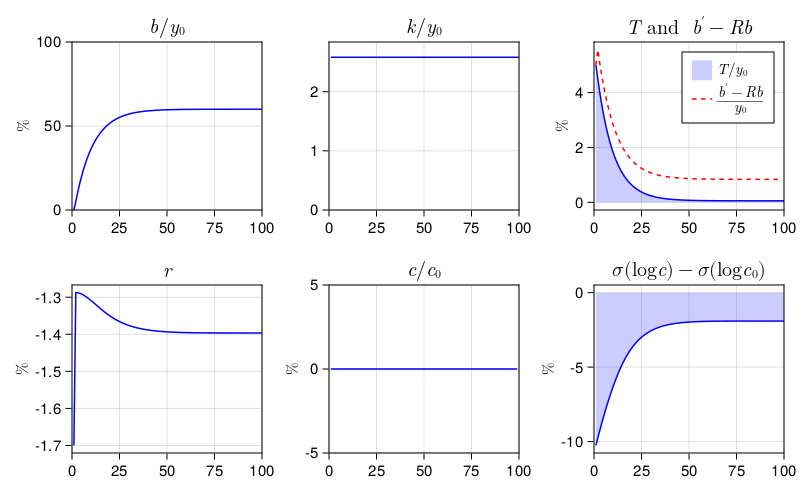

In [22]:
f1 = do_plots(path, e_init)

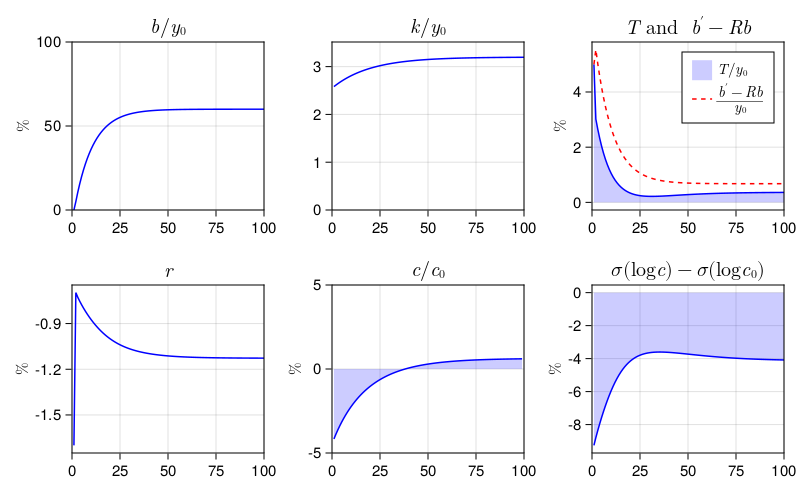

In [23]:
f2 = do_plots(path_2, e_init)

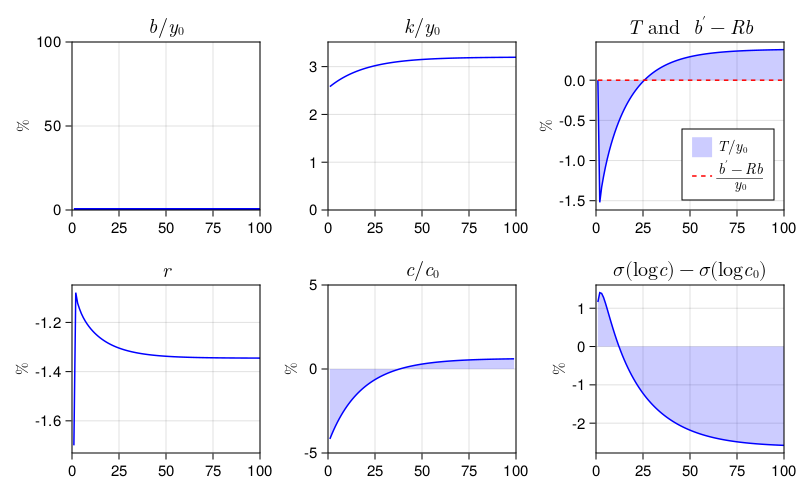

In [24]:
f3 = do_plots(path_3, e_init, legend_pos = :rb, last_plot = true)

##  Steady State Segniorage Plots

In [25]:
# Increasing the amax so that it doesn't bind
h_2 = let 
    v = GHH(θ = 1.0, ν = 0.2)

    ar1 = 0.9695
    sigmaP = sqrt(0.0384)/(1 + v.ν)
    sigmaIID = sqrt(0.0522)/(1 + v.ν)
    P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

    ies = 1 
    crra = 5.5
    β = 0.993
    u = EZ(ies = ies, ra = crra, β = β)
    Household(u = u, a_grid = grid(stop = 50, length = 500, scale = :log), 
        v = v, P = P, z_grid = z_vals)
end

EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..49.999999999999986

In [26]:
# Solve laissez-faire economy
@time e_init_2 = stationary_laissez_faire(h_2, t; r_range = (-0.02, 0.0), verbose = true)

Progress:  9 	 Time: 0:00:50
  r:      -0.01706912117451516
  error:  -4.642342066318861e-11


 50.465781 seconds (748.02 k allocations: 95.889 MiB, 0.15% gc time, 0.01% compilation time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..49.999999999999986, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.01706912117451516, w=0.1502069826148788, T=0.0, a=0.5608546918250435, k=0.560854691871467, b=0.0, n=0.7225256814832652

Progress:  8 	 Time: 0:00:22
  r:      -0.017069121171491126
  error:  6.78078704297036e-11

Progress:  9 	 Time: 0:00:22
  r:      -0.01706912117451516
  error:  -4.642342066318861e-11

Progress:  9 	 Time: 0:00:22
  r:      -0.01706912117451516
  error:  -4.642342066318861e-11


 22.965598 seconds (742.02 k allocations: 95.619 MiB, 0.24% gc time, 0.02% compilation time)


Stationary Equilibrium. Household: EZ(ra=5.5, ies=1.0, β=0.993), v=GHH(θ=1.0, ν=0.2), z_grid=[0.17222630362336608..3.6217622755477725], P=[..], a_grid = 0.0..500pts..49.999999999999986, Technology: α=0.3, A=0.32413131933855255, δ=0.1, r=-0.01706912117451516, w=0.1502069826148788, T=0.0, a=0.5608546918250435, k=0.560854691871467, b=0.0, n=0.7225256814832652

In [27]:
r_range_ = [e_init_2.r, 0.0]
b_range  =  2.6:-0.2:0.2
out = Array{Any}(undef, length(b_range))
p = Progress(length(b_range))
@time Threads.@threads for i in eachindex(b_range)
    b = b_range[i]
    sol = stationary_equilibrium_given_k_b(
        e_init_2,
        e_init_2.k,
        b * y(e_init_2);
        r_range = r_range_,
        verbose = false,
        hh_problem_kwargs = (;
            value_tol = 1e-7, 
            policy_tol = 1e-7, 
            pdf_tol = 1e-7)
    )
    out[i] = sol
    next!(p)
end
# out = @showprogress map(f, 2.6:-0.2:0.2)
push!(out, e_init_2);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:02


122.457544 seconds (7.24 M allocations: 839.377 MiB, 0.05% gc time, 9.57% compilation time)


Progress:  46%|███████████████████                      |  ETA: 0:01:36

Progress:  54%|███████████████████████                  |  ETA: 0:01:13

Progress:  62%|██████████████████████████               |  ETA: 0:00:55

Progress:  69%|█████████████████████████████            |  ETA: 0:00:49

Progress:  77%|████████████████████████████████         |  ETA: 0:00:41

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:25

Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:12

Progress: 100%|█████████████████████████████████████████| Time: 0:02:25


144.975126 seconds (7.28 M allocations: 841.890 MiB, 0.04% gc time, 8.06% compilation time)


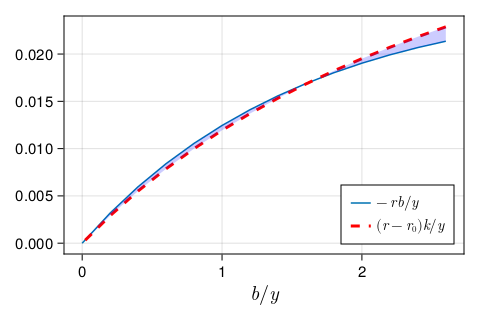

In [28]:
f4 = let
    b_y = [eq.b / y(eq) for eq in out]
    rb = [-eq.r * eq.b / y(eq) for eq in out]
    deltark = [(eq.r - e_init_2.r) * eq.k / y(eq) for eq in out]
    fig = Figure(fontsize = 15, resolution = (.8 * 600, .8 * 400))
    ax = Axis(fig[1, 1], xlabel = L"b/y", xlabelsize = 20)
    lines!(ax, b_y, rb,  label=L"$- r  b / y$")
    lines!(ax, b_y, deltark, color = :red, linestyle = :dash, linewidth = 3, label = L"$(r - r_0)  k / y")
    band!(ax, b_y, deltark, rb, color = (:blue, 0.2))
    axislegend(position = :rb)
    fig 
end

## Present Value of Elasticities

### Partial Equilibrium

In [29]:
cap_s = 50   # time of policy change
cap_t = 1_000  # total period of integration

1000

The interest rate is fixed.

In [30]:
function pv_PE(;R, ies_range, μ_range, 
    T = 0.0, w = 1.0, 
    cap_s = cap_s, cap_t = cap_t, Δ = 1e-4,
    value_tol = 1e-7, policy_tol = 1e-7, pdf_tol = 1e-7
)
    r = R - 1
    v = GHH(θ = 1.0, ν = 0.2)
    a_grid = grid(; stop = 250.0, length = 200, scale = :log)

    ar1 = 0.9695
    sigmaP = sqrt(0.0384)/(1 + v.ν)
    sigmaIID = sqrt(0.0522)/(1 + v.ν)
    P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

    δ = 0.1
    crra = 5.5 
    β = 0.993
    
    lst = similar(ies_range, Any)

    p = Progress(length(ies_range))
    Threads.@threads for i in eachindex(ies_range)
        ies = ies_range[i]
        u = EZ(ies = ies, ra = crra, β = β)
        h = Household(u = u, a_grid = a_grid, v = v, P = P, z_grid = z_vals)
        ws = stationary(h; R, T, w, verbose = false, value_tol, policy_tol, pdf_tol)

        !is_pol_valid(ws.a_pol, h) && @warn "R =$R, ies = $ies. Not valid policy!"

        cache = JacobianCache(ws; R, T, w, cap_s, cap_t, ΔR = 1e-4, ΔT = 0.0) # compute cache only once

        pv_lst = map(μ_range) do μ 
            Rk = μ * (r + δ) + 1 - δ
            return (; 
                pv = Rk > 1 ? pv_elasticities!(cache, cap_s; Rk) : nothing, 
                r, μ, ies, crra, β, dyn_efficient = Rk > 1)
        end
        lst[i] = pv_lst
        next!(p)
    end 
    
    return lst
end 

pv_PE (generic function with 1 method)

In [31]:
ies_range = range(0.05, 1.5, length = 100)
μ_range = range(1.001, 3.0, length = 75)
lst_PE = pv_PE(;R = 1 + e_init.r, ies_range, μ_range);

Progress: 100%|█████████████████████████████████████████| Time: 0:06:59


Progress:   5%|███                                      |  ETA: 0:10:07

Progress:   6%|███                                      |  ETA: 0:08:29

Progress:   7%|███                                      |  ETA: 0:07:18

Progress:   8%|████                                     |  ETA: 0:06:58

Progress:  12%|█████                                    |  ETA: 0:07:52

Progress:  14%|██████                                   |  ETA: 0:06:41

Progress:  16%|███████                                  |  ETA: 0:06:01

Progress:  17%|███████                                  |  ETA: 0:07:18

Progress:  18%|████████                                 |  ETA: 0:07:07

Progress:  19%|████████                                 |  ETA: 0:06:53

Progress:  20%|█████████                                |  ETA: 0:06:28

Progress:  21%|█████████                                |  ETA: 0:06:06

Progress:  22%|██████████                               |  ETA: 0:05:47

Progress:  23%|██████████                               |  ETA: 0:05:29

Progress:  24%|██████████                               |  ETA: 0:05:19

Progress:  30%|█████████████                            |  ETA: 0:05:04

Progress:  32%|██████████████                           |  ETA: 0:04:41

Progress:  33%|██████████████                           |  ETA: 0:05:14

Progress:  40%|█████████████████                        |  ETA: 0:04:13

Progress:  41%|█████████████████                        |  ETA: 0:04:44

Progress:  43%|██████████████████                       |  ETA: 0:04:40

Progress:  50%|█████████████████████                    |  ETA: 0:04:10

Progress:  51%|█████████████████████                    |  ETA: 0:04:03

Progress:  54%|███████████████████████                  |  ETA: 0:03:36

Progress:  55%|███████████████████████                  |  ETA: 0:03:28

Progress:  56%|███████████████████████                  |  ETA: 0:03:21

Progress:  57%|████████████████████████                 |  ETA: 0:03:30

Progress:  63%|██████████████████████████               |  ETA: 0:02:55

Progress:  64%|███████████████████████████              |  ETA: 0:02:48

Progress:  65%|███████████████████████████              |  ETA: 0:02:52

Progress:  68%|████████████████████████████             |  ETA: 0:02:39

Progress:  70%|█████████████████████████████            |  ETA: 0:02:25

Progress:  72%|██████████████████████████████           |  ETA: 0:02:12

Progress:  73%|██████████████████████████████           |  ETA: 0:02:10

Progress:  80%|█████████████████████████████████        |  ETA: 0:01:34

Progress:  81%|██████████████████████████████████       |  ETA: 0:01:29

Progress:  87%|████████████████████████████████████     |  ETA: 0:01:01

Progress:  89%|█████████████████████████████████████    |  ETA: 0:00:51

Progress:  96%|████████████████████████████████████████ |  ETA: 0:00:18

Progress:  98%|█████████████████████████████████████████|  ETA: 0:00:09

Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:05

Progress: 100%|█████████████████████████████████████████| Time: 0:07:35

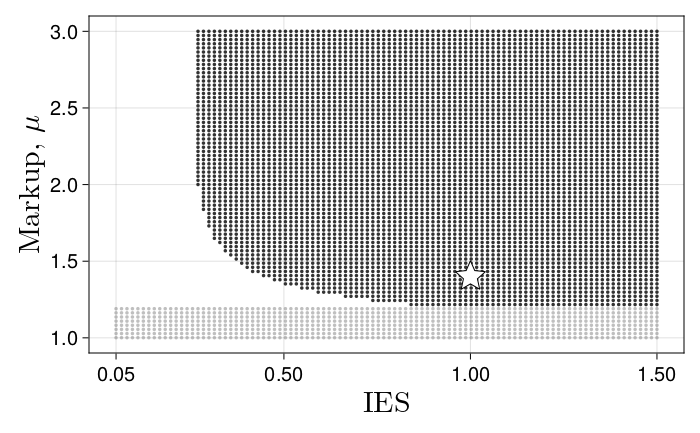

In [32]:
fig_pv_PE = let lst = lst_PE
    
    flattened_lst = collect(Base.Iterators.flatten(lst))

    dyn_eff = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv > 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    bad = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv <= 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    dyn_ine = let 
        tmp = filter(flattened_lst) do x 
            !x.dyn_efficient
        end
        [(x.ies, x.μ) for x in tmp]
    end

    fig = Figure(fontsize = 20,  resolution = (.7 * 1000, .7 * 1000 * _φ))
    ax = Axis(fig[1, 1], xlabel = LaTeXString("IES"), ylabel = LaTeXString("Markup, \$\\mu\$"), 
        xlabelsize = 30, ylabelsize = 30) 
    ax.xticks = [0.05, 0.5, 1., 1.5]
    plot!(ax, [x[1] for x in dyn_eff], [x[2] for x in dyn_eff], color = (:black, 0.8), markersize = 5)
    plot!(ax, [x[1] for x in dyn_ine], [x[2] for x in dyn_ine], color = (:gray, 0.5), markersize = 5)

    scatter!(ax, [1.0], [1.4], color = :white, markersize = 35, strokecolor = :black, strokewidth= 1, marker = :star5)
    fig
end

### General Equilibrium

The equilibrium interest rate is solved for each parameterization.

In [33]:
function pv_GE(
    μ_range;  
    ies = 1, crra = 5.5, β = 0.993,
    r_range = (-0,07, 0.00), verbose = true, cap_s = cap_s, cap_t = cap_t, Δ = 1e-4,
    value_tol = 1e-7, policy_tol = 1e-7, pdf_tol = 1e-7 
)
    h = let 
        v = GHH(θ = 1.0, ν = 0.2)

        ar1 = 0.9695
        sigmaP = sqrt(0.0384)/(1 + v.ν)
        sigmaIID = sqrt(0.0522)/(1 + v.ν)
        P, z_vals = calibration(5, 2 , ar1, sigmaP, sigmaIID)

        u = EZ(ies = ies, ra = crra, β = β)
        Household(u = u, a_grid = grid(stop = 200.0, length = 200), # Extending a_max given w normalization
            v = v, P = P, z_grid = z_vals) 
    end

    δ = 0.1
    α = 0.3

    w = 1.0  # Normalizing the wage
    T = 0.0
    ws = HouseholdWorkspace(; h, R = 1 + r_range[1], T, w)
    n = labor_supply(h; w)

    f = function (r) 
        stationary!(ws; R = 1 + r, T, w, verbose = false, value_tol, policy_tol, pdf_tol)
        aa = asset_supply(h.a_grid, ws.pdf) 
        dis =  aa / n * (1 - α) - α / (r + δ)
        return dis
    end 

    r = find_zero(f, r_range, Roots.A42(), atol = 1e-6)
    stationary!(ws; R = 1 + r, T, w, verbose = false)
    !is_pol_valid(ws.a_pol, h) && @warn "Not valid policy!"
    
    cache = JacobianCache(ws; R = 1 + r, T, w, cap_s, cap_t, ΔR = 1e-4, ΔT = 0.0) # compute cache only once

    pv_lst = map(μ_range) do μ 
        Rk = μ * (r + δ) + 1 - δ
        return (; 
            pv = Rk > 1 ? pv_elasticities!(cache, cap_s; Rk) : nothing, 
            r, μ, ies, crra, β, dyn_efficient = Rk > 1)
    end 
    return pv_lst
end 

pv_GE (generic function with 1 method)

In [34]:
ϵ_range = range(0.05, 1.5, length = 100)
μ_range = range(1.001, 3.0, length = 75)
lst_GE = similar(ϵ_range, Any)
p = Progress(length(ϵ_range))
@time Threads.@threads for i in eachindex(collect(reverse(ϵ_range)))
    lst_GE[i] =  pv_GE(μ_range; ies = ϵ_range[i], r_range = (-0.07, 0.00))
    next!(p)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:15:20


920.904918 seconds (82.27 M allocations: 31.012 GiB, 1.00% gc time, 1.26% compilation time)


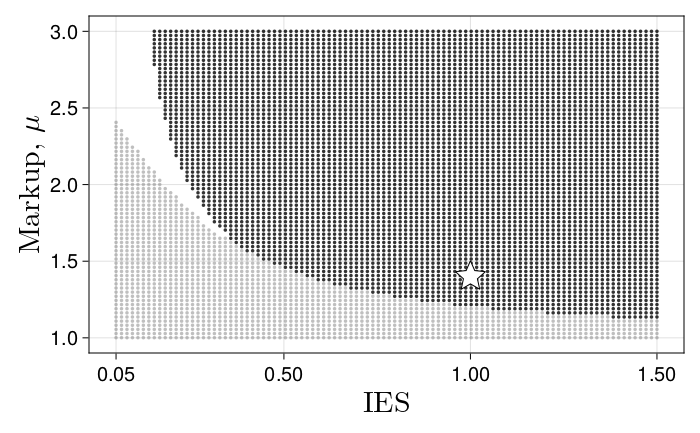

In [35]:
fig_pv_GE = let lst = lst_GE
    flattened_lst = collect(Base.Iterators.flatten(lst))

    dyn_eff = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv > 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    bad = let 
        tmp = filter(flattened_lst) do x 
            !isnothing(x.pv) && x.pv <= 1
        end
        [(x.ies, x.μ) for x in tmp]
    end

    dyn_ine = let 
        tmp = filter(flattened_lst) do x 
            !x.dyn_efficient
        end
        [(x.ies, x.μ) for x in tmp]
    end

    fig = Figure(fontsize = 20, resolution = (.7 * 1000, .7 * 1000 * _φ))
    ax = Axis(fig[1, 1], xlabel = LaTeXString("IES"), ylabel = LaTeXString("Markup, \$\\mu\$"), 
        xlabelsize = 30, ylabelsize = 30) 
    ax.xticks = [0.05, 0.5, 1., 1.5]
    plot!(ax, [x[1] for x in dyn_eff], [x[2] for x in dyn_eff], color = (:black, 0.8), markersize = 5)
    plot!(ax, [x[1] for x in dyn_ine], [x[2] for x in dyn_ine], color = (:gray, 0.5), markersize = 5)
    
    scatter!(ax, [1.0], [1.4], color = :white, markersize = 35, strokecolor = :black, strokewidth= 1, marker = :star5)

    fig 
end 

## Saving the Figures and Statistics

In [36]:
save(joinpath(@__DIR__, "..", "output", "figures", "transition_efficient_fixed_k.pdf"), f1)
save(joinpath(@__DIR__, "..", "output", "figures", "transition_efficient_golden_k.pdf"), f2)
save(joinpath(@__DIR__, "..", "output", "figures", "transition_efficient_no_debt.pdf"), f3)
save(joinpath(@__DIR__, "..", "output", "figures", "steady_state_transfers.pdf"), f4)

CairoMakie.Screen{PDF}


In [37]:
save(joinpath(@__DIR__, "..", "output", "figures", "pv_elasticities_regions_PE.pdf"), fig_pv_PE);
save(joinpath(@__DIR__, "..", "output", "figures", "pv_elasticities_regions_GE.pdf"), fig_pv_GE);

In [38]:
open(joinpath(@__DIR__, "..", "output", "tables", "statistics.txt"), "w") do file
    write(file, tab_1_2...)
end;

## SOME ADDITIONAL FIGURES 

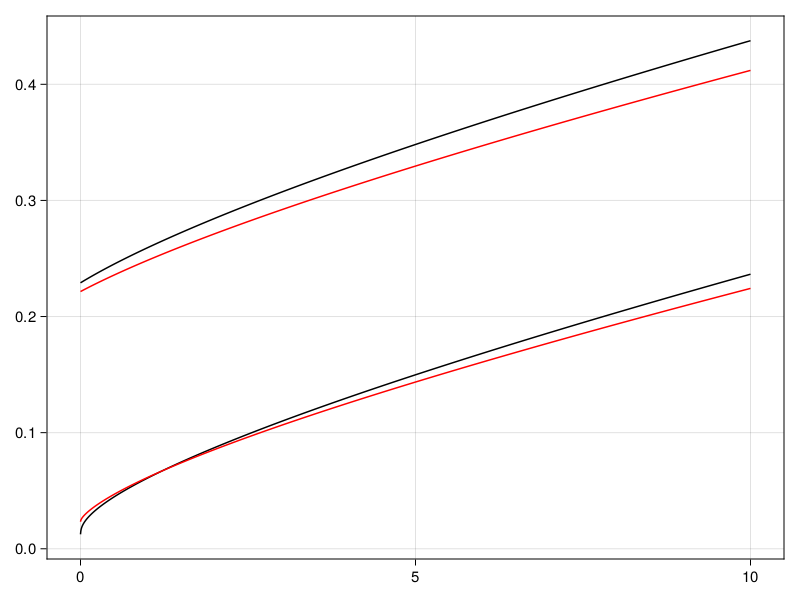

In [39]:
let i = 1
    # Plots the consumption policy functions in the laissez faire and after the policy change. 
    c0 = consumption_alloc(e_init)
    f, ax = lines(e_init.h.a_grid,  c0[:, 1], color = :black)
    lines!(ax, e_init.h.a_grid,  c0[:, end], color = :black)
    p = path[i]
    c0new = consumption_alloc(p.h; R = 1 + p.r, e_init.w, p.T, p.a_pol)
    lines!(ax, e_init.h.a_grid,  c0new[:, 1], color = :red)
    lines!(ax, e_init.h.a_grid,  c0new[:, end], color = :red)
    f
end 

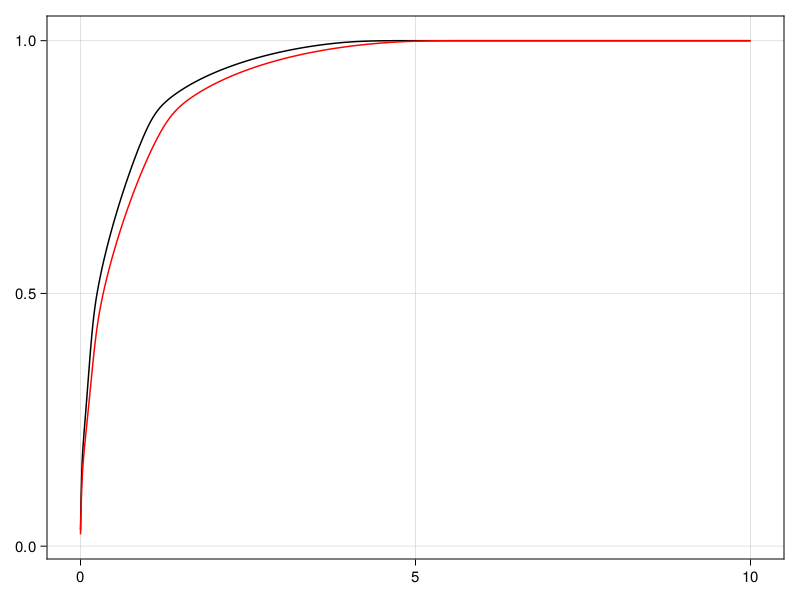

In [40]:
let 
    # Plots the wealth distribution in the laissez faire and in the new steady state after the policy change
    pdf_0 = cumsum(sum(e_init.ws.pdf, dims = 2)[:])
    f, ax = lines(e_init.h.a_grid, pdf_0, color = :black)
    pdf_1 = cumsum(sum(e_final.ws.pdf, dims = 2)[:])
    lines!(ax, e_init.h.a_grid, pdf_1, color = :red)
    f
end 

In [41]:
# Computes the average wealth by income level in the laissez faire and in the new steady state 
e_init.ws.pdf' * e_init.h.a_grid
e_final.ws.pdf' * e_init.h.a_grid

10-element Vector{Float64}:
 0.002586333100054223
 0.002586333100054223
 0.024333977800722398
 0.024333977800722398
 0.09142422148126955
 0.09142422148126955
 0.14572495046335487
 0.14572495046335487
 0.08107669162571454
 0.08107669162571454